# Solving Travelling Salesman Problem by Self Organizing Maps

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Essential Definitons

In [126]:
def normalize(points):
    ratio = (points.Longitude.max() - points.Longitude.min()) / (points.Latitude.max() - points.Latitude.min()), 1
    ratio = np.array(ratio) / max(ratio)
    norm = points.apply(lambda c: (c - c.min()) / (c.max() - c.min()))
    return norm.apply(lambda p: ratio * p, axis=1)

In [3]:
def euclidean_distance(a, b):
    """Return the array of distances of two numpy arrays of points."""
    return np.linalg.norm(a - b, axis=1)

In [4]:
def get_neighborhood(center, radix, domain):

    # Impose an upper bound on the radix to prevent NaN and blocks
    if radix < 1:
        radix = 1

    # Compute the circular network distance to the center
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)

    # Compute Gaussian distribution around the given center
    return np.exp(-(distances*distances) / (2*(radix*radix)))

In [116]:
def plot_network(cities, neurons, ax=None):
    """Plot a graphical representation of the problem"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        axis.plot(neurons['Longitude'], neurons['Latitude'], 'r.', ls='-', markersize=10)

        # plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        # plt.close()

    else:
        ax.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        ax.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', markersize=2)
        return ax


In [117]:
def plot_route(cities, route, ax=None):
    """Plot a graphical representation of the route obtained"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        axis.plot(route['Longitude'], route['Latitude'], color='purple', linewidth=1)

        # plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        # plt.close()

    else:
        ax.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        ax.plot(route['Longitude'], route['Latitude'], color='purple', linewidth=1)
        return ax


## SOM Code Begins

Completed 0 iterations. The network is-


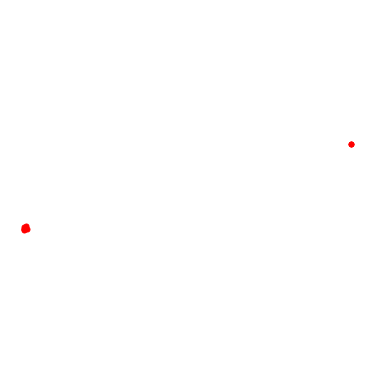

Completed 100 iterations. The network is-


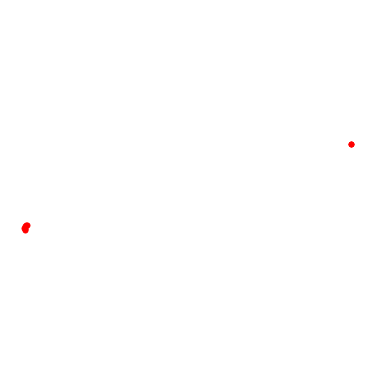

Completed 200 iterations. The network is-


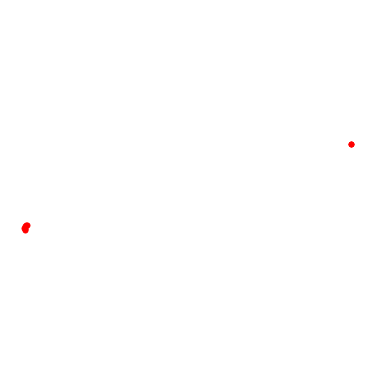

Completed 300 iterations. The network is-


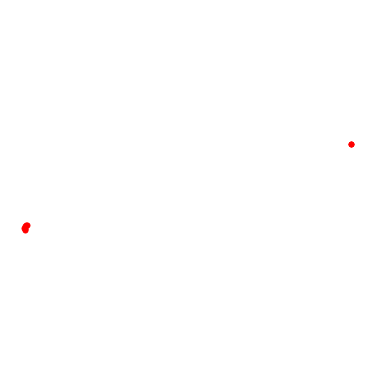

Completed 400 iterations. The network is-


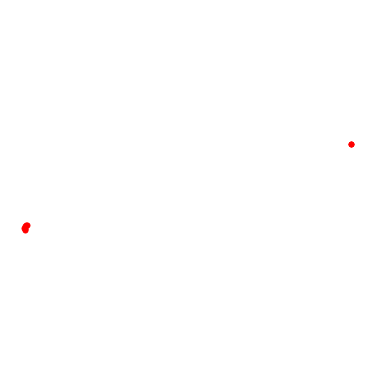

Completed 500 iterations. The network is-


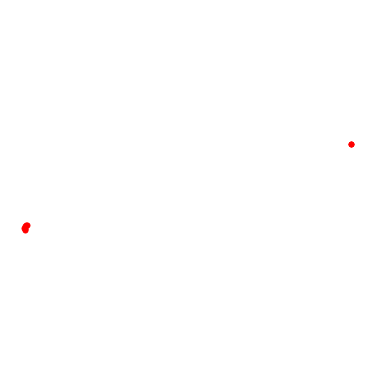

Completed 600 iterations. The network is-


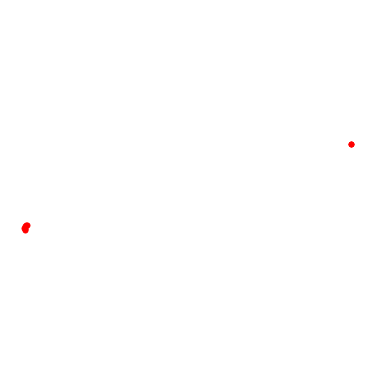

Completed 700 iterations. The network is-


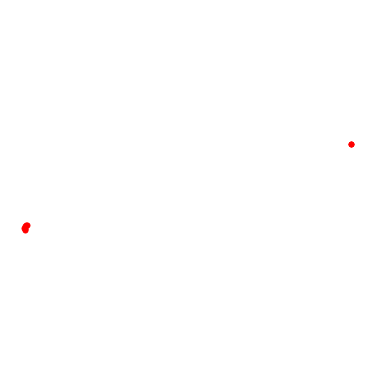

Completed 800 iterations. The network is-


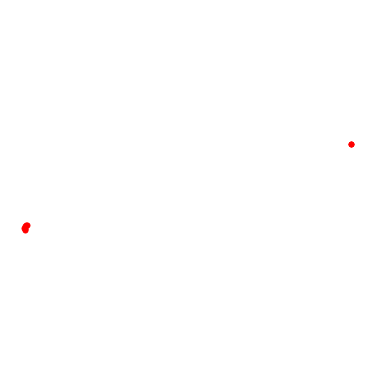

Completed 900 iterations. The network is-


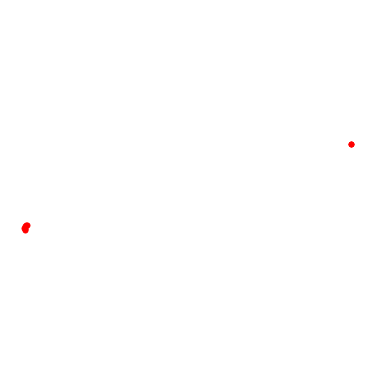

Completed 1000 iterations. The final network is-


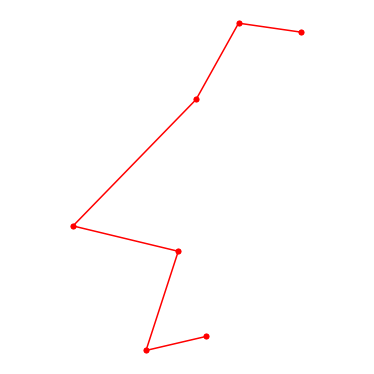

Final Route is:


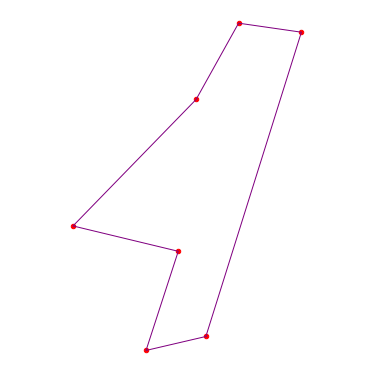

Length of Route: 0.24083645021691547


In [129]:
f = open('Dataset/locations_mumbai.csv')
cities = pd.read_csv(f)
cities = cities[['Longitude', 'Latitude']]

eta = 1
radii = 1
iterations = 1000
np.random.seed(100)

city = normalize(cities)
network = np.random.rand(len(city),2)

for i in range(iterations):
    winner  = euclidean_distance(network, city.sample(1).values).argmin()
    gaussian= get_neighborhood(winner, int(radii), len(city))
    network+= gaussian[:, np.newaxis]*eta*(city - network)
    eta = eta*0.99997
    radii = radii*0.9997
    
    if radii < 0.1 or eta<0.001:
        print(f"Radius/Rate has decayed at {i} iterations. Can't computer further.")
        break   
    
    if i % 100 == 0:
        print(f'Completed {i} iterations. The network is-')
        plot_network(cities, network)
        plt.show()
else:
    print('Completed {} iterations. The final network is-'.format(iterations))
    plot_network(city, network)
    plt.show()

city['winner'] = city.apply(lambda c: (euclidean_distance(network, c).argmin()), axis=1, raw=True)
route = city.sort_values('winner').index
print('Final Route is:')
plot_route(cities, route)
plt.show()
                            
cities = cities.reindex(route)
distance = np.sum(euclidean_distance(cities, np.roll(cities, 1, axis=0)))
print('Length of Route:', distance)